In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# loading data
data = np.loadtxt('data2.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')

(100, 3)


In [3]:
def data_normalization(data):
    maximum = np.max(data[:, :num_feature], axis=0, keepdims=True)
    minimun = np.min(data[:, :num_feature], axis=0, keepdims=True)
    return (data[:, :num_feature] - minimun)/(maximum - minimun)


# train val split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)
data_train[:, :num_feature] = data_normalization(data_train)
data_test[:, :num_feature] = data_normalization(data_test)

X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
y_train = data_train[:, 2].reshape(-1, 1)

X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
y_test = data_test[:, 2].reshape(-1, 1)


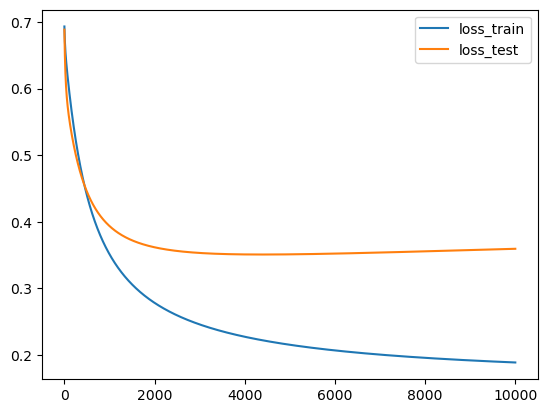

In [4]:
# model init
w = np.zeros((num_feature+1, 1))  # 初始化权重w全为0

def cross_entropy_loss(y_pred, y):
    return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))  # 计算损失值

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 假设函数

iterations = 10000
lr = 0.1

log = []
log_test = []
# gradient descent
for i in range(iterations):
    y_pred = sigmoid(np.matmul(X_train, w))  # 计算预测值
    g = lr*np.mean((y_pred-y_train)*X_train, axis=0).reshape(-1, 1)  # 计算梯度
    w -= g  # 梯度下降
    loss = cross_entropy_loss(y_pred, y_train)# 计算其损失值
    #print('iter:{},loss:{}'.format(i, loss))
    log.append([i, loss])
    
    
    y_pred_test = sigmoid(np.matmul(X_test, w))
    loss_test = cross_entropy_loss(y_pred_test, y_test)
    #print('iter:{},val_loss:{}'.format(i,loss_test))
    log_test.append([i, loss_test]) 

# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

log_test = np.array(log_test)
plt.plot(log_test[:,0],log_test[:,1])
plt.legend(["loss_train","loss_test"])

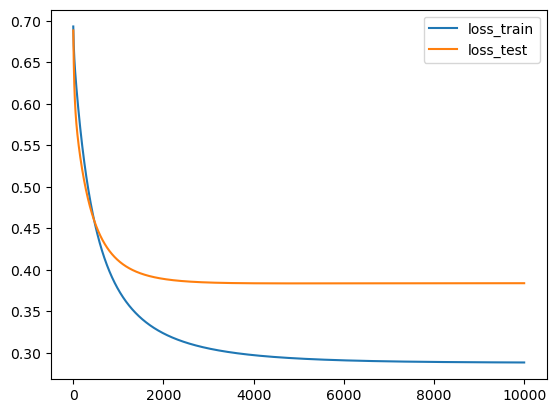

In [10]:
# model init
w = np.zeros((num_feature+1, 1))  # 初始化权重w全为0


def cross_entropy_loss(y_pred, y):
    return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))+np.mean(c*np.square(w))  # 计算损失值

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 假设函数


iterations = 10000
lr = 0.1

log2 = []
log_test2 = []
c = 0.001

# gradient descent
for i in range(iterations):
    y_pred = sigmoid(np.matmul(X_train, w))  # 计算预测值
    g = lr*(np.mean((y_pred-y_train)*X_train,
            axis=0).reshape(-1, 1)+2 * c*w)  # 正则化计算梯度
    w -= g  # 梯度下降
    loss = cross_entropy_loss(y_pred, y_train)  # 计算其损失值
    #print('iter:{},loss:{}'.format(i, loss))
    log2.append([i, loss])

    y_pred_test = sigmoid(np.matmul(X_test, w))
    loss_test2 = cross_entropy_loss(y_pred_test, y_test)
    #print('iter:{},val_loss:{}'.format(i, loss_test))
    log_test2.append([i, loss_test2])

# loss curve visualization
log2 = np.array(log2)
plt.plot(log2[:, 0], log2[:, 1])

log_test2 = np.array(log_test2)
plt.plot(log_test2[:, 0], log_test2[:, 1])
plt.legend(["loss_train", "loss_test"])


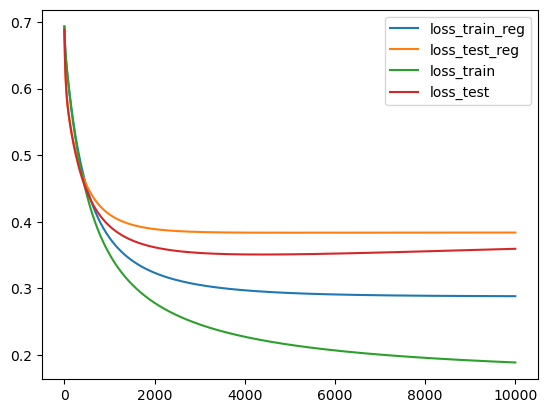

In [6]:
# loss curve visualization
log2 = np.array(log2)
plt.plot(log2[:, 0], log2[:, 1])

log_test2 = np.array(log_test2)
plt.plot(log_test2[:, 0], log_test2[:, 1])

################

log = np.array(log)
plt.plot(log[:,0],log[:,1])

log_test = np.array(log_test)
plt.plot(log_test[:,0],log_test[:,1])


plt.legend(["loss_train_reg", "loss_test_reg","loss_train","loss_test"])


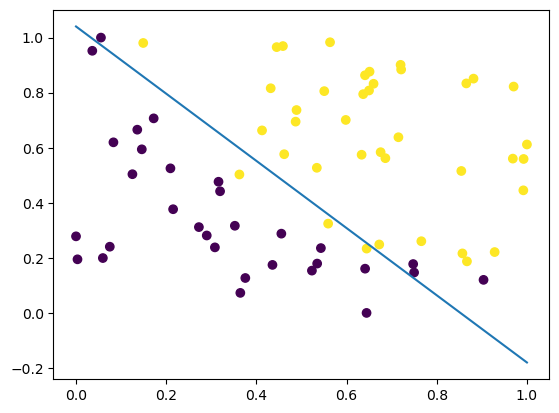

In [7]:
# visualization
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.flatten())
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)


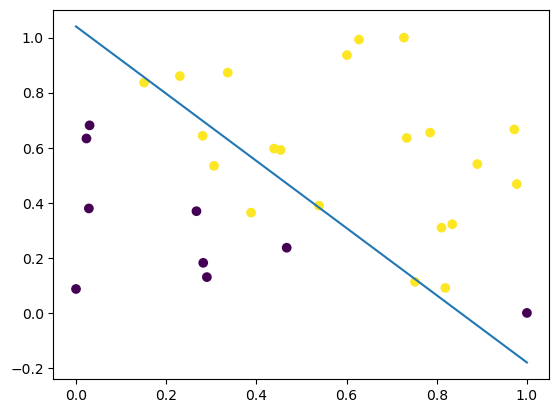

In [8]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test.flatten())
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)